# Best Stock Market Indicators for Day Traders

## Is it really hard to predict?

Data and Reference:   
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5219605/

With the pre-computed technical indicators based on historical stock data above, I would like to investigate the followings:
1. Identify indicators that could be useful for Day Trading
2. Is it really hard to predict? Supported by a visualization.
3. Accuracy of the predictions using 3 techniques: SVM classifier, SVM Classifier with PCA, and Neural Network Classifier.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [2]:
df_raw = pd.read_csv('S&P500.csv', delimiter=';')
df_raw.shape

(1723, 35)

# CRISP-DM: Business and Data Understanding

In [3]:
display(df_raw)

,Class,Date,Opening Price,Closing Price,Maximum,Minimum,Var. %,Return,MOMENTUM5,EMA12,...,CCI,ATR,UO,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,0,20100420.0,1195.75,1205.50,1205.75,1194.00,0.0084,N,N,N,...,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,20100421.0,1205.00,1200.50,1209.50,1195.00,-0.0041,-0.004147657,N,1204.730769,...,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,20100422.0,1198.50,1201.75,1207.00,1186.25,0.0010,0.001041233,N,1204.272189,...,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,20100423.0,1201.25,1212.25,1213.75,1197.50,0.0087,0.008737258,N,1205.499545,...,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,20100426.0,1211.25,1208.25,1216.75,1207.50,-0.0033,-0.003299649,N,1205.922692,...,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,20100427.0,1207.75,1181.00,1210.00,1177.50,-0.0226,-0.02255328,-24.5,1202.088432,...,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,20100428.0,1181.50,1190.00,1192.00,1176.75,0.0076,0.00762066,-10.5,1200.228673,...,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0,20100429.0,1190.00,1205.25,1206.25,1188.00,0.0128,0.012815126,3.5,1201.001185,...,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,20100430.0,1205.50,1183.50,1208.00,1182.75,-0.0180,-0.018046049,-28.75,1198.308695,...,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0,20100503.0,1184.50,1198.50,1202.00,1183.75,0.0127,0.012674271,-9.75,1198.338126,...,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Observations:
1. Some rows contains all NaN which will be removed.
2. Some columns contains all NaN which will be removed.
3. Some columns contains 'N' at the beginning. This makes sense as these are technical indicators which are not available yet. For example, MOMENTUM5 is calculated based on current price and price of 5 days ago. Therefore, it won't be calculated until day 6. All rows with 'N' will be removed from analysis.

# CRISP-DM: Data Preparation

In [4]:
# Remove columns with all null values
df_raw = df_raw.dropna(how='all', axis=1)

# Remove rows with all null values
df_raw = df_raw.dropna(how='all', axis=0)

# Remove all rows with 'N' values
df_raw = df_raw.drop(df_raw[np.sum(df_raw == 'N', axis = 1) != 0].index)

C:\Users\M.Yusoff\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [5]:
np.sum(df_raw.isnull())

Class                   0
Date                    0
Opening Price           0
Closing Price           0
Maximum                 0
Minimum                 0
Var. %                  0
Return                  0
MOMENTUM5               0
EMA12                   0
EMA26                   0
MACD 12-26              0
EMA9 of MACD12-26       0
MACD 12-26-9            0
ROI10                   0
ROI20                   0
ROI30                   0
RSI 10                  0
RSI 14                  0
RSI 30                  0
STOCHRSI10              0
STOCHRSI14              0
STOCHRSI30              0
ADX                     0
Williams%R              0
CCI                     0
ATR                     0
UO                      0
Unnamed: 30          1568
Unnamed: 31          1568
Unnamed: 32          1569
dtype: int64

#### After 3 steps above, there are 3 columns with non-zero number of NaNs. Since their names are all 'Unnamed', they will be removed.

In [6]:
to_be_dropped = ['Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32']
df_raw = df_raw.drop(to_be_dropped, axis=1)

In [31]:
# Write a function to implement all data cleaning steps above
def clean_data(df):
    '''
    INPUT:
    df - raw data
    
    OUTPUT:
    df - cleaned data
    '''

    # Remove columns with all null values
    df = df.dropna(how='all', axis=1)
    
    # Remove rows with all null values
    df = df.dropna(how='all', axis=0)

    # Remove all rows with 'N' values
    df = df.drop(df[np.sum(df == 'N', axis = 1) != 0].index)
    
    # Remove 'Unnamed' columns
    to_be_dropped = ['Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32']
    df = df.drop(to_be_dropped, axis=1)
    
    # To ensure all data are numeric
    df = df.apply(pd.to_numeric, errors='raise')
    
    after_processed = df.isnull().sum().sum()
    print('Number of missing values after processing is {}.'.format(after_processed))
            
    return df

df_raw = pd.read_csv('S&P500.csv', delimiter=';')
df_clean = clean_data(df_raw)
print('The shape of cleaned data is {}'.format(df_clean.shape))
df_clean.head()

Number of missing values after processing is 0.
The shape of cleaned data is (1570, 28)


C:\Users\M.Yusoff\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Class,Date,Opening Price,Closing Price,Maximum,Minimum,Var. %,Return,MOMENTUM5,EMA12,...,RSI 14,RSI 30,STOCHRSI10,STOCHRSI14,STOCHRSI30,ADX,Williams%R,CCI,ATR,UO
29,1,20100601.0,1088.50,1069.50,1096.00,1068.50,-1.75,-0.017455,-1.50,1095.438631,...,50.124796,50.686311,0.456614,0.185332,0.0,60.075827,-76.268116,-80.659478,31.530495,51.559407
30,1,20100602.0,1069.25,1096.75,1098.25,1067.25,2.55,0.025479,23.75,1095.640380,...,49.709238,50.472996,0.583809,0.000000,0.0,60.024364,-56.521739,-54.973958,31.492602,53.150815
31,0,20100603.0,1097.00,1103.50,1105.25,1090.75,0.62,0.006155,42.25,1096.849552,...,49.916178,50.466666,0.724254,0.167157,0.0,60.500695,-45.621181,-21.091355,30.278845,56.758550
32,0,20100604.0,1104.00,1066.00,1107.75,1059.25,-3.40,-0.033983,-35.00,1092.103467,...,50.092403,50.435512,1.000000,0.309503,0.0,60.701730,-73.589165,-68.316641,31.580356,46.907870
33,1,20100607.0,1064.00,1048.00,1070.75,1047.00,-1.69,-0.016886,-40.50,1085.318318,...,50.314280,50.372969,1.000000,0.488725,0.0,60.888404,-89.841986,-107.953913,31.021045,46.893024


### Column Selection

Since we would like to investigate which indicators are useful in predicting the price increase or decrease on the next day (if possible at all), the following columns will be dropped.

In [8]:
to_be_dropped = ['Date', 'Opening Price', 'Closing Price', 'Maximum', 'Minimum', 'Return']
df_clean = df_clean.drop(to_be_dropped, axis=1)
print('The shape of cleaned data is {}'.format(df_clean.shape))

The shape of cleaned data is (1570, 22)


### List of indicators

Refer the link below for the meaning of each indicator used in this investigation.   
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5219605/

In [9]:
print('The list of indicators')
list(df_clean.columns[1:])

The list of indicators


['Var. %',
 'MOMENTUM5',
 'EMA12',
 'EMA26',
 'MACD 12-26',
 'EMA9 of MACD12-26',
 'MACD 12-26-9',
 'ROI10',
 'ROI20',
 'ROI30',
 'RSI 10',
 'RSI 14',
 'RSI 30',
 'STOCHRSI10',
 'STOCHRSI14',
 'STOCHRSI30',
 'ADX',
 'Williams%R',
 'CCI',
 'ATR',
 'UO']

# CRISP-DM: Data Modeling

Can we predict tomorrow's price increase?   
Let's compare the accuracy using 3 approaches   
1. Grid Search based on SVM Classifier
2. SVM Classifier using PCA
3. Neural Network Classifier

In [10]:
y = df_clean.Class
X = df_clean.drop('Class', axis=1)

# SVM Classifier

In [11]:
scaler = MinMaxScaler() # default=(0, 1)
scaler.fit(X)
scaled_X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.1, random_state=42)

In [12]:
# build a classifier for support vector machines
clf_svc = SVC()

# Set up the hyperparameter search
# look at setting up your search for C (recommend 0-10 range), 
# kernel, and degree
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
param_dist = {"C": [0.1, 0.5, 1, 3],
              "kernel": ['linear', 'rbf'],
              "gamma": ['auto']
             }

# Run a randomized search over the hyperparameters
svc_search = RandomizedSearchCV(clf_svc, cv=3, param_distributions=param_dist)

# Fit the model on the training data
svc_search.fit(X_train, y_train)

# Make predictions on the test data
svc_preds = svc_search.best_estimator_.predict(X_test)

C:\Users\M.Yusoff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [13]:
def print_metrics(y_true, preds, model_name=None):
    '''
    INPUT:
    y_true - the y values that are actually true in the dataset (numpy array or pandas series)
    preds - the predictions for those values from some model (numpy array or pandas series) 
    
    OUTPUT:
    None - prints the accuracy, precision, recall, and F1 score
    '''
    print('Accuracy score: ', format(accuracy_score(y_true, preds)))
    print('Precision score: ', format(precision_score(y_true, preds)))
    print('Recall score: ', format(recall_score(y_true, preds)))
    print('F1 score: ', format(f1_score(y_true, preds)))

In [14]:
# Make predictions on the training data
train_preds = svc_search.best_estimator_.predict(X_train)
print('====Training Data====')
print_metrics(y_train, train_preds)

====Training Data====
Accuracy score:  0.5640481245576787
Precision score:  0.5684754521963824
Recall score:  0.6094182825484764
F1 score:  0.588235294117647


In [15]:
print('====Testing Data====')
print_metrics(y_test, svc_preds)

====Testing Data====
Accuracy score:  0.5031847133757962
Precision score:  0.5172413793103449
Recall score:  0.5555555555555556
F1 score:  0.5357142857142857


# PCA Decomposition

#### How many components are necessary?
#### What are the most weighted indicators?
#### And more importantly, how is the accuracy of the prediction?

In [16]:
# Apply PCA to the data.
pca = PCA()
Xpca = pca.fit_transform(X)
print(Xpca.shape)
pca

(1570, 21)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [17]:
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [18]:
Xpca.shape

(1570, 21)

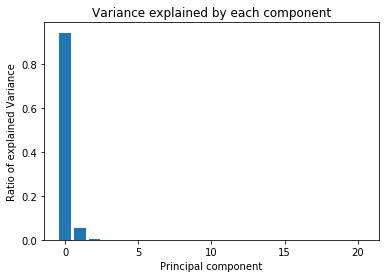

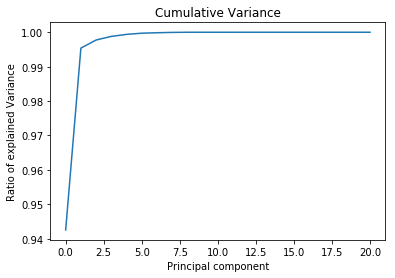

In [19]:
# Investigate the variance accounted for by each principal component.

plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.title("Variance explained by each component")
plt.xlabel("Principal component")
plt.ylabel("Ratio of explained Variance")
plt.show()

plt.plot(range(len(pca.explained_variance_ratio_)),np.cumsum(pca.explained_variance_ratio_))
plt.title("Cumulative Variance")
plt.xlabel("Principal component")
plt.ylabel("Ratio of explained Variance")
plt.show()

In [20]:
np.cumsum(pca.explained_variance_ratio_)

array([0.94256736, 0.99539048, 0.99774414, 0.99879143, 0.99938069,
       0.99972609, 0.99985486, 0.99995481, 0.99999614, 0.99999838,
       0.99999915, 0.99999959, 0.99999985, 0.99999993, 0.99999997,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

#### Two components explain more than 99%!!!

# Question 1: Important indicators for Day Trading
#### Let's analyze the most weighted indicators for each component

In [21]:
def pca_weights(pca, no_component, no_features):
    '''
    INPUT:
    pca - the PCA
    no_component - principal component number 
    no_features - number of features
    
    OUTPUT:
    None - prints top 5 features and plot the features with their weights
    '''
    df = pd.DataFrame(pca.components_, columns=X.columns)
    weights = abs(df.iloc[no_component-1]).sort_values(ascending=False)
    features = weights.index[:no_features]
    s = pd.Series(df.iloc[no_component-1][features].values, index=features)
    s.plot(kind='barh',rot=0)
    plt.title("Ranking of the Features")
    plt.xlabel("Weight")
    plt.ylabel("Features")
    print('Top {} features in principal component no {}'.format(no_features, no_component))
    display(s)

Top 5 features in principal component no 1


EMA12   -0.707551
EMA26   -0.706410
CCI      0.018209
ADX     -0.003016
ATR     -0.002624
dtype: float64

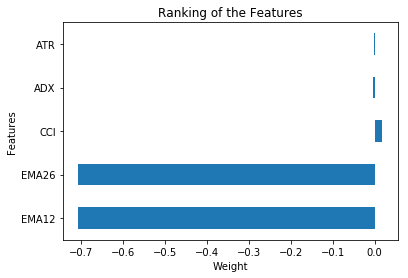

In [22]:
pca_weights(pca, 1, 5)

Top 5 features in principal component no 2


CCI          -0.936850
Williams%R   -0.243844
MOMENTUM5    -0.215871
UO           -0.073389
MACD 12-26   -0.071729
dtype: float64

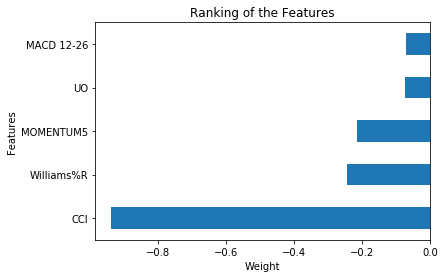

In [23]:
pca_weights(pca, 2, 5)

#### Answer 1: As can be seen from plots above, EMA12, EMA26 and CCI are 3 most weighted indicators from PCA components 1 and 2 which explained more than 99% of original data.

#### What is the accuracy using PCA?
Let's use the two components to train SVM classifier.

In [24]:
newX = Xpca[:,0:2]
X_train, X_test, y_train, y_test = train_test_split(newX, y, test_size=0.1, random_state=42)

# Fit the model on the training data
svc_search.fit(X_train, y_train)

# Make predictions on the test data
svc_preds = svc_search.best_estimator_.predict(X_test)

# Make predictions on the training data
train_preds = svc_search.best_estimator_.predict(X_train)

print('====Training Data====')
print_metrics(y_train, train_preds)

print('====Testing Data====')
print_metrics(y_test, svc_preds)

C:\Users\M.Yusoff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


====Training Data====
Accuracy score:  0.5477707006369427
Precision score:  0.5586987270155587
Recall score:  0.5470914127423823
F1 score:  0.5528341497550734
====Testing Data====
Accuracy score:  0.5031847133757962
Precision score:  0.5189873417721519
Recall score:  0.5061728395061729
F1 score:  0.5125


Such a low accuracy even when two components explain more than 99% variance!

# Question 2: Is it really difficult to predict?

Let's visualize the two PCA components.

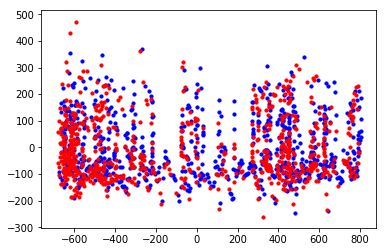

In [25]:
dfnewX = pd.DataFrame(newX)
dfnewX.columns = 'x1', 'x2'
dfnewX['y'] = y.values
idx_1 = np.where(dfnewX.y == 1)
idx_0 = np.where(dfnewX.y == 0)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(dfnewX.iloc[idx_1].x1, dfnewX.iloc[idx_1].x2, s=10, c='b', marker="o")
ax1.scatter(dfnewX.iloc[idx_0].x1, dfnewX.iloc[idx_0].x2, s=10, c='r', marker="o")
plt.show()

As can be seen from the plot above, there is no clear separation between the two classes!   
Therefore, binary classificatiosn algorithm may not be effective to classify stock market data.

# Neural Network Classifier

In [26]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

Using TensorFlow backend.


In [27]:
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)

(1413, 2)
(157, 2)


In [28]:
# TODO: Build the model architecture
model = Sequential()
model.add(Dense(4096, activation='relu', input_dim=2))
model.add(Dropout(0.1))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

# TODO: Compile the model using a loss function and an optimizer.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4096)              12288     
_________________________________________________________________
dropout_1 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dropout_2 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              4195328   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               262400    
__________

In [29]:
# TODO: Run the model. Feel free to experiment with different batch sizes and number of epochs.
model.fit(X_train, y_train,
          batch_size=20,
          epochs=10,
          validation_data=(X_test, y_test), 
          verbose=2)

Train on 1413 samples, validate on 157 samples
Epoch 1/10
 - 18s - loss: 7.7919 - acc: 0.5138 - val_loss: 7.8024 - val_acc: 0.5159
Epoch 2/10
 - 17s - loss: 7.8822 - acc: 0.5110 - val_loss: 7.8024 - val_acc: 0.5159
Epoch 3/10
 - 16s - loss: 7.8822 - acc: 0.5110 - val_loss: 7.8024 - val_acc: 0.5159
Epoch 4/10
 - 15s - loss: 7.8822 - acc: 0.5110 - val_loss: 7.8024 - val_acc: 0.5159
Epoch 5/10
 - 15s - loss: 7.8822 - acc: 0.5110 - val_loss: 7.8024 - val_acc: 0.5159
Epoch 6/10
 - 16s - loss: 7.8822 - acc: 0.5110 - val_loss: 7.8024 - val_acc: 0.5159
Epoch 7/10
 - 16s - loss: 7.8822 - acc: 0.5110 - val_loss: 7.8024 - val_acc: 0.5159
Epoch 8/10
 - 15s - loss: 7.8822 - acc: 0.5110 - val_loss: 7.8024 - val_acc: 0.5159
Epoch 9/10
 - 16s - loss: 7.8822 - acc: 0.5110 - val_loss: 7.8024 - val_acc: 0.5159
Epoch 10/10
 - 16s - loss: 7.8822 - acc: 0.5110 - val_loss: 7.8024 - val_acc: 0.5159


In [30]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: ", score[1])

Accuracy:  0.5159235693466891


# Question 3: Predictions Accuracy

Model | Training Accuracy | Testing Accuracy
--- | --- | ---
SVM | 56% | 50%
SVM with PCA | 55% | 50%
Neural Network | 51% | 52% 

# Conclusion

Based on the data used in this investigation, it is really difficult to predict the price movement based on technical indicators.